![title](../static/wcar.png)
#  iRNA of RNA Binding Proteins

    Wellcome Centre for Anti-Infectives Research
    School of Life Sciences, University of Dundee


In [1]:
%load_ext rpy2.ipython
%matplotlib inline

In [2]:
#set up code
import sys
sys.path.append('../')
import utilities as PTUT
#import ProtRank
import warnings
warnings.filterwarnings("ignore")
#define helphttp://localhost:8888/notebooks/calvin/new_data/analysis_427_2018.ipynb#ing function
import os
from tqdm import tqdm_notebook
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from adjustText import adjust_text
from matplotlib.lines import Line2D
from Bio import SeqIO
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
plt.style.use('ggplot')

In [3]:
# Load Dataset

In [4]:
df_name = '20210618_112159_115_2021_DUN_DH_TbruceiTREU927_added_BES_GFP-BLA_Report_protein_mw_peptides.txt.zip'
df = pd.read_csv(df_name,sep='\t')
df.head()

,PG.MolecularWeight,PG.ProteinAccessions,PG.Genes,PG.ProteinDescriptions,PG.ProteinNames,[1] 6-4+a.raw.PG.IsSingleHit,[2] 6-4+b.raw.PG.IsSingleHit,[3] 6-4+c.raw.PG.IsSingleHit,[4] 6-4-a.raw.PG.IsSingleHit,[5] 6-4-b.raw.PG.IsSingleHit,...,[12] 8-4-c.raw.PG.Quantity,[13] 8-7+a.raw.PG.Quantity,[14] 8-7+b.raw.PG.Quantity,[15] 8-7+c.raw.PG.Quantity,[16] 8-7-a.raw.PG.Quantity,[17] 8-7-b.raw.PG.Quantity,[18] 8-7-c.raw.PG.Quantity,[19] GFP-a.raw.PG.Quantity,[20] GFP-b.raw.PG.Quantity,[21] GFP-c.raw.PG.Quantity
0,40776.21,GFP.BLA,NaN,Reporter protein,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,657373.25,7466479.5,7573164,7482479,1005413.688,945643.25,996387,1144193.25,1349816.125,1347236.5
1,18603.02;18603.02,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,NaN,transcript=Tb05.5K5.100:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,174333.9063,145858.2656,153558.5625,140064.6406,169937.0469,171597.9063,168614.3906,118716.9766,122133.6641,151233.0313
2,94061.35;94103.43,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,NaN,transcript=Tb05.5K5.110:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,1346840.125,1762202.125,1338600.25,1379844.25,2272457.5,2803821.5,2095318.875,1779644.125,2171076.25,2023829.875
3,95765.04;95765.04,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,NaN,transcript=Tb05.5K5.120:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,284509.7188,286744.5,277901.625,310525.9688,296435.875,312068.0625,289644.5313,260349.0938,257573.3594,274341.9375
4,68313.98;68313.98,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,NaN,transcript=Tb05.5K5.130:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2632349,2750688.75,2776377.75,2493742.75,2616210.75,2580914.5,2705292.25,2877781,2666045.75,2983822


In [5]:
cols = (['[1] 6-4+a.raw.PG.Quantity',
 '[2] 6-4+b.raw.PG.Quantity',
 '[3] 6-4+c.raw.PG.Quantity',
 '[4] 6-4-a.raw.PG.Quantity',
 '[5] 6-4-b.raw.PG.Quantity',
 '[6] 6-4-c.raw.PG.Quantity',
 '[7] 8-4+a.raw.PG.Quantity',
 '[8] 8-4+b.raw.PG.Quantity',
 '[9] 8-4+c.raw.PG.Quantity',
 '[10] 8-4-a.raw.PG.Quantity',
 '[11] 8-4-b.raw.PG.Quantity',
 '[12] 8-4-c.raw.PG.Quantity',
 '[13] 8-7+a.raw.PG.Quantity',
 '[14] 8-7+b.raw.PG.Quantity',
 '[15] 8-7+c.raw.PG.Quantity',
 '[16] 8-7-a.raw.PG.Quantity',
 '[17] 8-7-b.raw.PG.Quantity',
 '[18] 8-7-c.raw.PG.Quantity',
 '[19] GFP-a.raw.PG.Quantity',
 '[20] GFP-b.raw.PG.Quantity',
 '[21] GFP-c.raw.PG.Quantity'])

In [6]:
mask = df[[n.replace('PG.Quantity','PG.IsSingleHit') for n in cols]]
mask.columns = cols
mask=mask.replace('Filtered', True)
mask=mask.replace('FALSE', False)
mask=mask.replace('TRUE', True)
print(mask.shape)
mask.head(10)

(5414, 21)


,[1] 6-4+a.raw.PG.Quantity,[2] 6-4+b.raw.PG.Quantity,[3] 6-4+c.raw.PG.Quantity,[4] 6-4-a.raw.PG.Quantity,[5] 6-4-b.raw.PG.Quantity,[6] 6-4-c.raw.PG.Quantity,[7] 8-4+a.raw.PG.Quantity,[8] 8-4+b.raw.PG.Quantity,[9] 8-4+c.raw.PG.Quantity,[10] 8-4-a.raw.PG.Quantity,...,[12] 8-4-c.raw.PG.Quantity,[13] 8-7+a.raw.PG.Quantity,[14] 8-7+b.raw.PG.Quantity,[15] 8-7+c.raw.PG.Quantity,[16] 8-7-a.raw.PG.Quantity,[17] 8-7-b.raw.PG.Quantity,[18] 8-7-c.raw.PG.Quantity,[19] GFP-a.raw.PG.Quantity,[20] GFP-b.raw.PG.Quantity,[21] GFP-c.raw.PG.Quantity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
selection = df[cols]
selection = selection.mask(mask)
#selection[mask]=np.nan
#selection=selection[selection.isna().sum(axis=1)<=500]
#selection=selection.astype(float)
selection.head(10)

,[1] 6-4+a.raw.PG.Quantity,[2] 6-4+b.raw.PG.Quantity,[3] 6-4+c.raw.PG.Quantity,[4] 6-4-a.raw.PG.Quantity,[5] 6-4-b.raw.PG.Quantity,[6] 6-4-c.raw.PG.Quantity,[7] 8-4+a.raw.PG.Quantity,[8] 8-4+b.raw.PG.Quantity,[9] 8-4+c.raw.PG.Quantity,[10] 8-4-a.raw.PG.Quantity,...,[12] 8-4-c.raw.PG.Quantity,[13] 8-7+a.raw.PG.Quantity,[14] 8-7+b.raw.PG.Quantity,[15] 8-7+c.raw.PG.Quantity,[16] 8-7-a.raw.PG.Quantity,[17] 8-7-b.raw.PG.Quantity,[18] 8-7-c.raw.PG.Quantity,[19] GFP-a.raw.PG.Quantity,[20] GFP-b.raw.PG.Quantity,[21] GFP-c.raw.PG.Quantity
0,662510.25,707159,646057.9375,1109581.25,944173.5625,856184.25,720392.25,687662.0625,695438.25,759905,...,657373.25,7466479.5,7573164,7482479,1005413.688,945643.25,996387,1144193.25,1349816.125,1347236.5
1,114690.9766,128483.0625,111074.6484,167405.5313,151360.9375,162077.8906,111098.6953,126131.6719,129992.3594,180045.7344,...,174333.9063,145858.2656,153558.5625,140064.6406,169937.0469,171597.9063,168614.3906,118716.9766,122133.6641,151233.0313
2,1563448.875,1852020.75,1866613.875,2357439.25,1907905.5,2255454,1860188.25,1896992.5,1901785.5,1899311.875,...,1346840.125,1762202.125,1338600.25,1379844.25,2272457.5,2803821.5,2095318.875,1779644.125,2171076.25,2023829.875
3,186962.8906,187011.7188,217264.5469,247776.3906,271916,261519.8906,208414.4844,203201.1719,210241.875,277001.0938,...,284509.7188,286744.5,277901.625,310525.9688,296435.875,312068.0625,289644.5313,260349.0938,257573.3594,274341.9375
4,2001408.875,1629075.375,2143743.5,2536182,2642000,2539547.25,2174132.75,2103495.5,2105590.25,2529122,...,2632349,2750688.75,2776377.75,2493742.75,2616210.75,2580914.5,2705292.25,2877781,2666045.75,2983822
5,3170597.75,4121915.75,3302463,2847370.5,2969620.25,3179358.75,3402756.25,3257732.5,3394494,2888494.25,...,3040316.5,2820050,3191968.5,2869043,2892180.25,2612244.25,2863870.5,2477160.5,2508878.5,2500846.75
6,557999.875,653796.125,583223.5,737191.8125,629630.25,644060.25,596846.25,665362.75,675938.375,566591.9375,...,514393.7188,691029.4375,686661.875,638443.875,569658,555440.5,564057.3125,720625.875,693865.5625,606181.4375
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,180633.5938,183462.1719,174092.9688,148101.5,158822.3438,160688.1563,182359.5469,163394.1406,170131.6563,154813.8594,...,133048.4219,139300.1094,141089.1875,142001.9219,157617.2188,162657.7031,161948.75,152527.4844,158821.3594,160455.9531
9,2292854.5,2395911,2354847.75,2840700,2571254.5,2395846.25,1722742,1620564.125,1519989.75,2506401.5,...,2523664.5,2581503.75,2773400,2426866.25,2647464.25,2789073,2552363,2677332.25,2769876.25,2704943.75


In [8]:
new_cols = (['P64-1','P64-2','P64-3'] + 
        ['M64-1','M64-2','M64-3']+ 
        ['P84-1','P84-2','P84-3']+
        ['M84-1','M84-2','M84-3']+
        ['P87P1','P87P2','P87P3']+
        ['M87-1','M87-2','M87-3']+
        ['GFP1','GFP2','GFP3'])

selection.columns = new_cols
selection = selection.astype(float)




In [9]:
selection = selection.dropna(how='all')
selection.head(20)

,P64-1,P64-2,P64-3,M64-1,M64-2,M64-3,P84-1,P84-2,P84-3,M84-1,...,M84-3,P87P1,P87P2,P87P3,M87-1,M87-2,M87-3,GFP1,GFP2,GFP3
0,6.625102e+05,7.071590e+05,6.460579e+05,1.109581e+06,9.441736e+05,8.561842e+05,7.203922e+05,6.876621e+05,6.954382e+05,7.599050e+05,...,6.573732e+05,7.466480e+06,7.573164e+06,7.482479e+06,1.005414e+06,9.456432e+05,9.963870e+05,1.144193e+06,1.349816e+06,1.347236e+06
1,1.146910e+05,1.284831e+05,1.110746e+05,1.674055e+05,1.513609e+05,1.620779e+05,1.110987e+05,1.261317e+05,1.299924e+05,1.800457e+05,...,1.743339e+05,1.458583e+05,1.535586e+05,1.400646e+05,1.699370e+05,1.715979e+05,1.686144e+05,1.187170e+05,1.221337e+05,1.512330e+05
2,1.563449e+06,1.852021e+06,1.866614e+06,2.357439e+06,1.907906e+06,2.255454e+06,1.860188e+06,1.896992e+06,1.901786e+06,1.899312e+06,...,1.346840e+06,1.762202e+06,1.338600e+06,1.379844e+06,2.272458e+06,2.803822e+06,2.095319e+06,1.779644e+06,2.171076e+06,2.023830e+06
3,1.869629e+05,1.870117e+05,2.172645e+05,2.477764e+05,2.719160e+05,2.615199e+05,2.084145e+05,2.032012e+05,2.102419e+05,2.770011e+05,...,2.845097e+05,2.867445e+05,2.779016e+05,3.105260e+05,2.964359e+05,3.120681e+05,2.896445e+05,2.603491e+05,2.575734e+05,2.743419e+05
4,2.001409e+06,1.629075e+06,2.143744e+06,2.536182e+06,2.642000e+06,2.539547e+06,2.174133e+06,2.103496e+06,2.105590e+06,2.529122e+06,...,2.632349e+06,2.750689e+06,2.776378e+06,2.493743e+06,2.616211e+06,2.580914e+06,2.705292e+06,2.877781e+06,2.666046e+06,2.983822e+06
5,3.170598e+06,4.121916e+06,3.302463e+06,2.847370e+06,2.969620e+06,3.179359e+06,3.402756e+06,3.257732e+06,3.394494e+06,2.888494e+06,...,3.040316e+06,2.820050e+06,3.191968e+06,2.869043e+06,2.892180e+06,2.612244e+06,2.863870e+06,2.477160e+06,2.508878e+06,2.500847e+06
6,5.579999e+05,6.537961e+05,5.832235e+05,7.371918e+05,6.296302e+05,6.440602e+05,5.968462e+05,6.653628e+05,6.759384e+05,5.665919e+05,...,5.143937e+05,6.910294e+05,6.866619e+05,6.384439e+05,5.696580e+05,5.554405e+05,5.640573e+05,7.206259e+05,6.938656e+05,6.061814e+05
8,1.806336e+05,1.834622e+05,1.740930e+05,1.481015e+05,1.588223e+05,1.606882e+05,1.823595e+05,1.633941e+05,1.701317e+05,1.548139e+05,...,1.330484e+05,1.393001e+05,1.410892e+05,1.420019e+05,1.576172e+05,1.626577e+05,1.619488e+05,1.525275e+05,1.588214e+05,1.604560e+05
9,2.292854e+06,2.395911e+06,2.354848e+06,2.840700e+06,2.571254e+06,2.395846e+06,1.722742e+06,1.620564e+06,1.519990e+06,2.506402e+06,...,2.523664e+06,2.581504e+06,2.773400e+06,2.426866e+06,2.647464e+06,2.789073e+06,2.552363e+06,2.677332e+06,2.769876e+06,2.704944e+06
10,5.483503e+05,5.522406e+05,5.642394e+05,1.082524e+06,9.361429e+05,9.027499e+05,5.988929e+05,6.962665e+05,6.956904e+05,8.927434e+05,...,8.859978e+05,1.130184e+06,1.192322e+06,9.270150e+05,9.091094e+05,9.622824e+05,9.710108e+05,1.123032e+06,1.055404e+06,9.105478e+05


In [10]:
OUT_FOLDER='E927'
!mkdir -p E927

# Missing Values

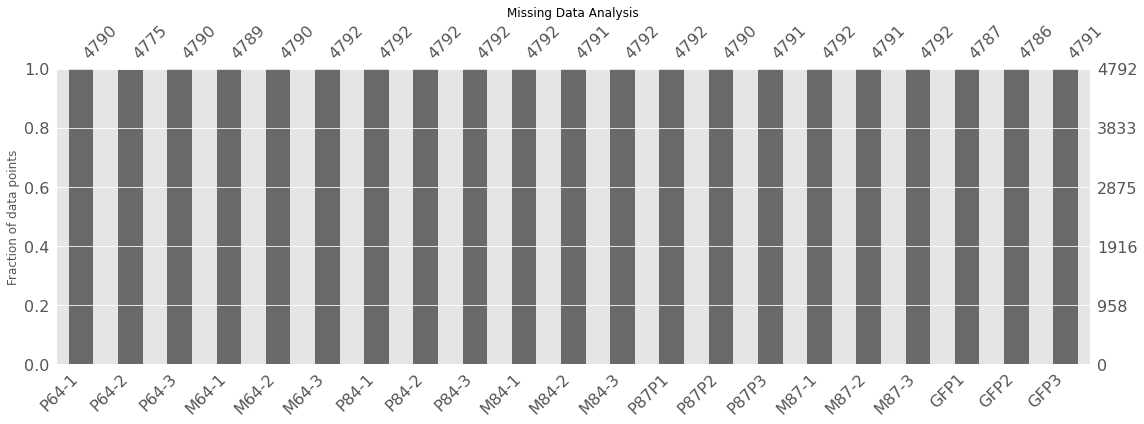

In [11]:
#visualization of missing data
ax=msno.bar(selection.replace(0,np.nan), figsize=(16, 6))
plt.title('Missing Data Analysis', size=12)
ax.set_ylabel('Fraction of data points',size=12)
plt.savefig(os.path.join(OUT_FOLDER,'1_missing_value_bar.png'))
plt.tight_layout()
plt.show()

# Values Distribution

In [12]:
palette=['r','r','r','g','g','g']*3+['b']*3
palette_g = ['r','g','b']
color_dictionary = {'r':'Plus','g':'Minus','b':'GFP'}

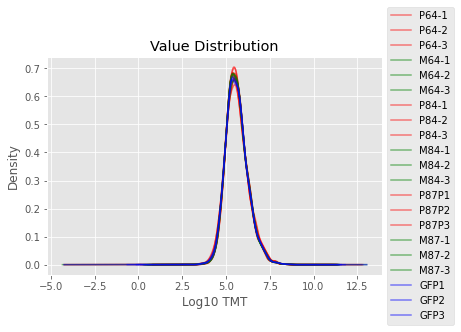

In [13]:
np.log10(selection).plot(kind='kde', color=palette, alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Value Distribution')
plt.xlabel('Log10 TMT')
plt.savefig(os.path.join(OUT_FOLDER,'3_value_distribution_kde.png'))
plt.show()

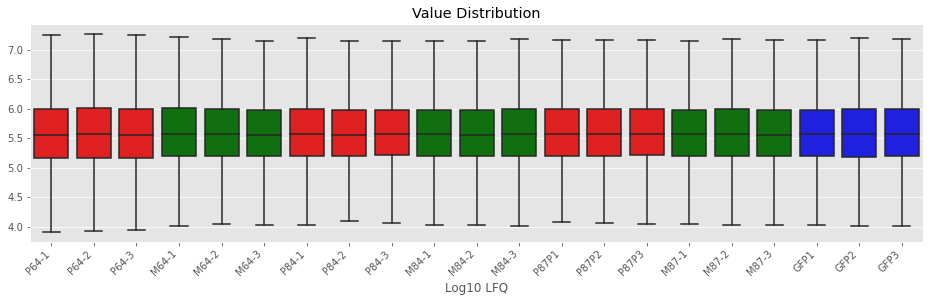

In [14]:
fig,ax=plt.subplots(figsize=(16,4))
sns.boxplot(data = np.log10(selection), showfliers=False, palette=palette,ax=ax)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.xticks(rotation=45,ha='right')
plt.savefig(os.path.join(OUT_FOLDER,'4_value_distribution_box.png'))
plt.show()

# MDS

{'r': 'Plus', 'g': 'Minus', 'b': 'GFP'}


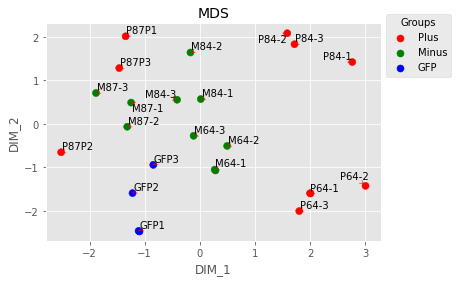

In [15]:
fig, ax = plt.subplots()

ax = PTUT.make_mds(np.log10(selection), palette, ax, top=500,
                   color_dictionary=color_dictionary)
plt.savefig(os.path.join(OUT_FOLDER,'5_mds.png')) 

# Equalize Median

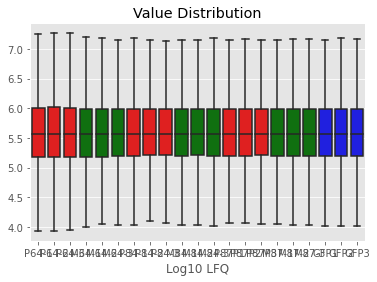

In [16]:
#https://codereview.stackexchange.com/questions/25417/is-there-a-better-way-to-make-a-function-silent-on-need
class NoStdStreams(object):
    def __init__(self, stdout = None, stderr = None):
        self.devnull = open(os.devnull,'w')
        self._stdout = stdout or self.devnull or sys.stdout
        self._stderr = stderr or self.devnull or sys.stderr

    def __enter__(self):
        self.old_stdout, self.old_stderr = sys.stdout, sys.stderr
        self.old_stdout.flush(); self.old_stderr.flush()
        sys.stdout, sys.stderr = self._stdout, self._stderr

    def __exit__(self, exc_type, exc_value, traceback):
        self._stdout.flush(); self._stderr.flush()
        sys.stdout = self.old_stdout
        sys.stderr = self.old_stderr
        self.devnull.close()

with NoStdStreams():
   selection_normed = PTUT.norm_loading(selection)

sns.boxplot(data =np.log10(selection_normed),showfliers=False,palette=palette)
plt.title('Value Distribution')
plt.xlabel('Log10 LFQ')
plt.savefig(os.path.join(OUT_FOLDER,'6_value_distribution_box.png'))
plt.show()

# Log Transform

In [17]:
selection_normed=np.log2(selection_normed)
#['64P']*3+['64M']*3+['84P']*3+['84M']*3+['87P']*3+['87M']*3+['GFP']*3

In [18]:
selection_normed.head()

,P64-1,P64-2,P64-3,M64-1,M64-2,M64-3,P84-1,P84-2,P84-3,M84-1,...,M84-3,P87P1,P87P2,P87P3,M87-1,M87-2,M87-3,GFP1,GFP2,GFP3
0,19.384837,19.439865,19.341596,20.037289,19.834087,19.722509,19.433367,19.405782,19.410226,19.540290,...,19.326346,22.801202,22.840148,22.821974,19.938804,19.816658,19.944555,20.126115,20.369548,20.369329
1,16.854647,16.979409,16.801462,17.308692,17.193028,17.321275,16.736426,16.959013,16.990730,17.462834,...,17.411486,17.123413,17.216113,17.082622,17.374087,17.354394,17.381577,16.857382,16.903318,17.214171
2,20.623555,20.828859,20.872284,21.124494,20.848953,21.119933,20.801961,20.869724,20.861586,20.861876,...,20.361140,20.718153,20.339977,20.382963,21.115268,21.384685,21.016947,20.763373,21.055196,20.956414
3,17.559647,17.520960,17.769385,17.874384,18.038196,18.011508,17.644039,17.646991,17.684354,18.084362,...,18.118111,18.098611,18.071898,18.231243,18.176806,18.217223,18.162133,17.990303,17.979841,18.073373
4,20.979839,20.643812,21.071993,21.229932,21.318594,21.291087,21.026952,21.018799,21.008456,21.275035,...,21.327912,21.360566,21.392456,21.236770,21.318493,21.265172,21.385562,21.456741,21.351487,21.516487


# Subselection MKT1

In [19]:
selection_normed_64 = selection_normed[['P64-1','P64-2','P64-3','M64-1','M64-2','M64-3']]

## Missing Values

<AxesSubplot:>

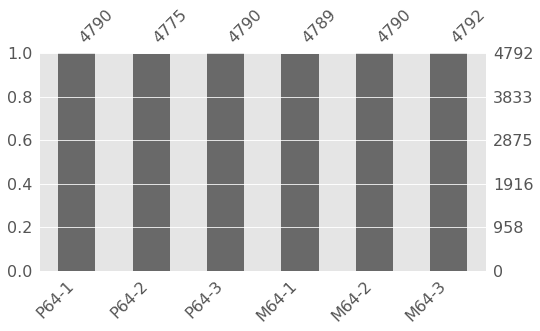

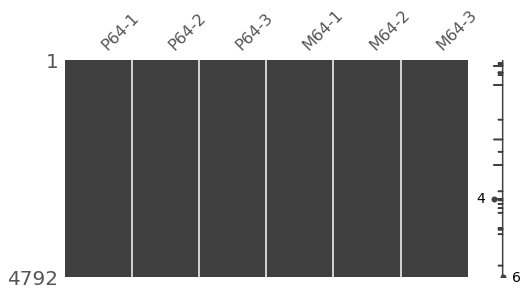

In [20]:
msno.bar(selection_normed_64, figsize=(8, 4))
msno.matrix(selection_normed_64 , figsize=(8, 4))

In [21]:
selection_normed_64['isna']=selection_normed_64.isna().sum(axis=1)
selection_normed_64['isna'].value_counts()

0    4771
1      16
2       5
Name: isna, dtype: int64

In [22]:
selection_normed_64[selection_normed_64['isna']>0].join(df[['PG.ProteinAccessions']])

,P64-1,P64-2,P64-3,M64-1,M64-2,M64-3,isna,PG.ProteinAccessions
85,15.184235,NaN,15.076868,15.176558,15.512458,15.677445,1,Tb11.v5.0147.1-p1;Tb927.7.4600:mRNA-p1
135,16.771049,16.694500,16.635611,14.244197,NaN,14.408743,1,Tb11.v5.0223.1-p1;Tb927.5.440:mRNA-p1
154,NaN,NaN,13.782833,15.052774,14.430620,14.745073,2,Tb11.v5.0257.1-p1;Tb927.11.7250:mRNA-p1
329,12.375212,NaN,11.461101,12.113049,11.656914,11.300942,1,Tb427.BES122.1
349,11.883586,13.536555,11.942982,11.369064,NaN,14.049377,1,Tb427.BES28.15;Tb427.BES5.12
403,13.675710,NaN,14.763852,15.334880,15.255521,15.167990,1,Tb927.1.1790:mRNA-p1
644,0.047254,NaN,13.193519,NaN,15.837086,15.710676,2,Tb927.10.12210:mRNA-p1
1485,16.213690,16.154437,16.329818,NaN,14.530255,18.267873,1,Tb927.11.10470:mRNA-p1
1985,15.704873,NaN,NaN,17.509445,14.412319,17.614458,2,Tb927.11.1730:mRNA-p1
2292,13.914414,NaN,14.661252,16.507447,16.678912,16.432758,1,Tb927.11.5690:mRNA-p1


In [23]:
#keep only proteins with less than 4 missing values
print(selection_normed_64.shape)
selection_normed_64=selection_normed_64[selection_normed_64['isna']<=3]
print(selection_normed_64.shape)
selection_normed_64.drop(['isna'],inplace=True,axis=1)
print(selection_normed_64.shape)

(4792, 7)
(4792, 7)
(4792, 6)


## fill missing MKT1

In [24]:
%%R -i selection_normed_64
set.seed(81)
options(warn=-1)
library("missForest")
library("doParallel")
registerDoParallel(cores=4)
imputed_selection_normed <- missForest(selection_normed_64, 
                                       ntree = 20, 
                                       parallelize = "forests",
                                      replace=TRUE)$ximp

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!
  missForest iteration 5 in progress...done!
  missForest iteration 6 in progress...done!


In [25]:
%R -o imputed_selection_normed
imputed_selection_normed.index = selection_normed_64.index.values
imputed_selection_normed.head(20)

,P64.1,P64.2,P64.3,M64.1,M64.2,M64.3
0,19.384837,19.439865,19.341596,20.037289,19.834087,19.722509
1,16.854647,16.979409,16.801462,17.308692,17.193028,17.321275
2,20.623555,20.828859,20.872284,21.124494,20.848953,21.119933
3,17.559647,17.520960,17.769385,17.874384,18.038196,18.011508
4,20.979839,20.643812,21.071993,21.229932,21.318594,21.291087
5,21.643578,21.983074,21.695403,21.396904,21.487242,21.615251
6,19.137159,19.326672,19.193982,19.447385,19.249540,19.311783
8,17.509961,17.493313,17.449791,17.131931,17.262449,17.308851
9,21.175968,21.200333,21.207495,21.393520,21.279435,21.207051
10,19.111993,19.083128,19.146240,20.001672,19.821764,19.798914


In [26]:
selection_normed_64[selection_normed_64.isna().sum(axis=1)>1]

,P64-1,P64-2,P64-3,M64-1,M64-2,M64-3
154,NaN,NaN,13.782833,15.052774,14.430620,14.745073
644,0.047254,NaN,13.193519,NaN,15.837086,15.710676
1985,15.704873,NaN,NaN,17.509445,14.412319,17.614458
2623,NaN,NaN,10.261830,11.832240,11.898665,12.022564
3463,13.405601,NaN,NaN,14.478069,15.040411,14.663024


In [27]:
imputed_selection_normed.loc[selection_normed_64[selection_normed_64.isna().sum(axis=1)>1].index]

,P64.1,P64.2,P64.3,M64.1,M64.2,M64.3
154,14.090364,14.270504,13.782833,15.052774,14.430620,14.745073
644,0.047254,13.868214,13.193519,14.967664,15.837086,15.710676
1985,15.704873,16.119168,15.658940,17.509445,14.412319,17.614458
2623,10.803937,11.974459,10.261830,11.832240,11.898665,12.022564
3463,13.405601,14.250869,13.914075,14.478069,15.040411,14.663024


In [28]:
selection_normed_64.mean()

P64-1    18.688322
P64-2    18.678491
P64-3    18.685587
M64-1    18.660383
M64-2    18.661210
M64-3    18.684627
dtype: float64

## test MKT1

In [29]:
%%R -i imputed_selection_normed
options(warn=-1)
library("limma")

f<- factor(c(rep("P64",3),rep("M64",3))
           
           ,levels=c("P64","M64"))

design<- model.matrix(~0+f)
colnames(design)<- c("P64","M64")

#block <- c(1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)
#block <- c(1,1,2,2,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)

#dupcor <- duplicateCorrelation(imputed_X, design, block=block)

#https://support.bioconductor.org/p/77093/
#fit2<- lmFit(imputed_X, design, block=block, correlation=dupcor$consensus)
fit2<- lmFit(imputed_selection_normed, design)
contrast.matrix<- makeContrasts("P64-M64",
                                levels=design)

fit2<- contrasts.fit(fit2, contrast.matrix)
fit2<- eBayes(fit2)

tt_limma_1 <- topTable(fit2, coef = 1, sort.by = "none", number = Inf)



In [30]:
%R -o tt_limma_1
tt_limma_1.index = imputed_selection_normed.index.values

## Visualize test

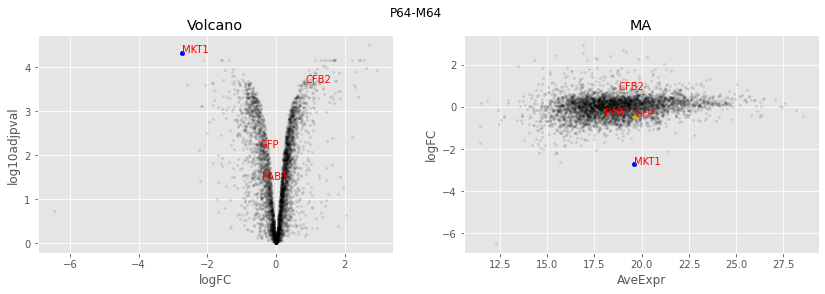

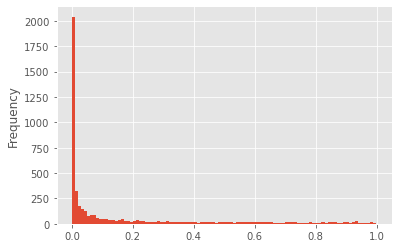

In [31]:

pval_col = 'log10pval'
pval_col = 'log10adjpval'

MKT1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.6.4770:')].index.values[0]
PAB1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.8.4540:')].index.values[0]
CFB2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.1.4650:')].index.values[0]
GFP_index = 0


for table,name,p_index,p_id in zip([tt_limma_1],
                      
                 ["P64-M64"] ,
                             
                  [MKT1_index],
                  
                ['Tb927.6.4770'],                                
                                
                     
                     ):

    
    fig,axes=plt.subplots(figsize=(14,4), ncols=2, nrows=1)
    ax=axes[0]
    table['log10pval']=-np.log10(table['P.Value'])
    table['log10adjpval']=-np.log10(table['adj.P.Val'])
    
    table.plot(x='logFC',y=pval_col,
           kind='scatter',s=5, alpha=0.1, ax=ax, c='black')
    
    
    table.loc[[p_index]].plot(x='logFC',y=pval_col,
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    #table.loc[[DRBD17_index]].plot(x='logFC',y=pval_col,
    #       kind='scatter',s=20,alpha=1,ax=ax,c='y')


    
    texts = [ax.text(table.loc[i]['logFC'], 
                       table.loc[i][pval_col],
                       ['MKT1' , 'CFB2' ,'PAB1','GFP'][p], c='r')
                       for p,i in enumerate([p_index,CFB2_index,PAB1_index,GFP_index])]


    
    #ax.set_xlim(-4,4)
    ax.set_title('Volcano')
    ax=axes[1]
    table.plot(x='AveExpr',y='logFC',
           kind='scatter',s=5,alpha=0.1,ax=ax,c='black')
    
    table.loc[[p_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='AveExpr',y='logFC',
     #      kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='AveExpr',y='logFC',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    table.loc[[GFP_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='y')

    
    
    texts = [ax.text(table.loc[i]['AveExpr'], 
                       table.loc[i]['logFC'],
                       ['MKT1' , 'CFB2' ,'PAB1','GFP'][p], c='r',fontsize=10)
                       for p,i in enumerate([p_index,CFB2_index,PAB1_index,GFP_index])]


    
    
    
    #ax.set_ylim(-4,4)
    ax.set_title('MA')
    plt.suptitle(name)
    plt.savefig(os.path.join(OUT_FOLDER,'prot_volcano_ma_'+name+'.png'))
    plt.show()
    
    table['P.Value'].plot(kind='hist',bins=100)
    plt.show()

In [32]:
tt_limma_1.columns = ["P64-M64_"+n for n in tt_limma_1.columns]
all_df = pd.concat([df,tt_limma_1],axis=1)
all_df.head(10)

,PG.MolecularWeight,PG.ProteinAccessions,PG.Genes,PG.ProteinDescriptions,PG.ProteinNames,[1] 6-4+a.raw.PG.IsSingleHit,[2] 6-4+b.raw.PG.IsSingleHit,[3] 6-4+c.raw.PG.IsSingleHit,[4] 6-4-a.raw.PG.IsSingleHit,[5] 6-4-b.raw.PG.IsSingleHit,...,[20] GFP-b.raw.PG.Quantity,[21] GFP-c.raw.PG.Quantity,P64-M64_logFC,P64-M64_AveExpr,P64-M64_t,P64-M64_P.Value,P64-M64_adj.P.Val,P64-M64_B,P64-M64_log10pval,P64-M64_log10adjpval
0,40776.21,GFP.BLA,NaN,Reporter protein,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,1349816.125,1347236.5,-0.475862,19.626697,-5.297854,0.001920,0.006766,-1.693717,2.716640,2.169648
1,18603.02;18603.02,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,NaN,transcript=Tb05.5K5.100:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,122133.6641,151233.0313,-0.395826,17.076419,-5.722345,0.001300,0.005122,-1.253362,2.886167,2.290584
2,94061.35;94103.43,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,NaN,transcript=Tb05.5K5.110:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2171076.25,2023829.875,-0.256227,20.903013,-2.402742,0.053712,0.090694,-5.356802,1.269927,1.042423
3,95765.04;95765.04,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,NaN,transcript=Tb05.5K5.120:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,257573.3594,274341.9375,-0.358032,17.795680,-4.121018,0.006410,0.016507,-3.045417,2.193108,1.782338
4,68313.98;68313.98,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,NaN,transcript=Tb05.5K5.130:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2666045.75,2983822,-0.381323,21.089209,-3.258322,0.017657,0.036628,-4.164007,1.753093,1.436188
5,21771.26;21771.26,Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,NaN,transcript=Tb05.5K5.150:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2508878.5,2500846.75,0.274219,21.636909,2.499597,0.047142,0.081553,-5.219705,1.326596,1.088559
6,108202.16;108202.16,Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,NaN,transcript=Tb05.5K5.160:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,693865.5625,606181.4375,-0.116965,19.277753,-1.483374,0.189224,0.258557,-6.613813,0.723025,0.587444
7,29576.31;28980.58,Tb05.5K5.170:mRNA-p1;Tb927.5.4530:mRNA-p1,NaN,transcript=Tb05.5K5.170:mRNA | gene=Tb05.5K5.1...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,...,516343.375,179234.3906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,48697.02;36427.76,Tb05.5K5.20:mRNA-p1;Tb927.5.4360:mRNA-p1,NaN,transcript=Tb05.5K5.20:mRNA | gene=Tb05.5K5.20...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,158821.3594,160455.9531,0.249945,17.359383,4.006692,0.007284,0.018312,-3.187526,2.137648,1.737255
9,55321.5;55321.5;55321.5,Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5...,NaN,transcript=Tb05.5K5.200:mRNA | gene=Tb05.5K5.2...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2769876.25,2704943.75,-0.098737,21.243967,-1.595286,0.162497,0.227723,-6.470469,0.789156,0.642593


In [33]:
all_df['Gene_id'] = [PTUT.clean_id(n.split(':')[0].split(';')[0])
                     for n in df['PG.ProteinAccessions']]

desc_value='gene_product'
all_df['desc'] = df['PG.ProteinDescriptions'].apply(PTUT.make_desc, lookfor=desc_value)
find = all_df[all_df['desc']=='none'].index.values
all_df['desc'].loc[find]=all_df['PG.ProteinAccessions'].loc[find]
all_df.to_csv('FinalDataset_batch1_927_MKT1.csv')

## Save for web app

In [34]:
for_web_app = all_df.rename({'desc':'Desc'}, axis=1)
for_web_app['Gene_acc']=np.arange(0,all_df.shape[0])

temp=for_web_app[['Gene_acc','PG.ProteinAccessions',
                    'P64-M64_logFC','P64-M64_AveExpr','P64-M64_adj.P.Val','Desc']]
temp.columns = ['Gene_acc','Gene_id','logFC','log_AveExpr','FDR','Desc']

temp = temp.dropna()
temp.to_csv('web_data/E927/E64/indata_64.csv',index=False)

r_dict = {
'[1] 6-4+a.raw.PG.Quantity':'64P1',
'[2] 6-4+b.raw.PG.Quantity':'64P2',
'[3] 6-4+c.raw.PG.Quantity':'64P3',
'[4] 6-4-a.raw.PG.Quantity':'64M1',
'[5] 6-4-b.raw.PG.Quantity':'64M2',
'[6] 6-4-c.raw.PG.Quantity':'64M3'}


for_web_app.rename(r_dict,axis=1,inplace=True)
temp2 = for_web_app[['Gene_acc','PG.ProteinAccessions','64P1','64P2','64P3',
      '64M1','64M2','64M3','Desc']]
temp2.rename({'PG.ProteinAccessions':'Gene_id'} )
temp2=temp2.loc[temp.index]
temp.head()
temp2.to_csv('web_data/E927/E64/indata2_64.csv',index=False)

temp2.head(10)

,Gene_acc,PG.ProteinAccessions,64P1,64P2,64P3,64M1,64M2,64M3,Desc
0,0,GFP.BLA,662510.25,707159,646057.9375,1109581.25,944173.5625,856184.25,GFP.BLA
1,1,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,114690.9766,128483.0625,111074.6484,167405.5313,151360.9375,162077.8906,"hypothetical protein, conserved"
2,2,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,1563448.875,1852020.75,1866613.875,2357439.25,1907905.5,2255454,"major vault protein, putative"
3,3,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,186962.8906,187011.7188,217264.5469,247776.3906,271916,261519.8906,"hypothetical protein, conserved"
4,4,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,2001408.875,1629075.375,2143743.5,2536182,2642000,2539547.25,"paraflagellar rod component par4, putative"
5,5,Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,3170597.75,4121915.75,3302463,2847370.5,2969620.25,3179358.75,"ras-like small GTPase, putative"
6,6,Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,557999.875,653796.125,583223.5,737191.8125,629630.25,644060.25,Kinetochore interacting protein 1
8,8,Tb05.5K5.20:mRNA-p1;Tb927.5.4360:mRNA-p1,180633.5938,183462.1719,174092.9688,148101.5,158822.3438,160688.1563,"hypothetical protein, conserved"
9,9,Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5...,2292854.5,2395911,2354847.75,2840700,2571254.5,2395846.25,"guanine deaminase, putative"
10,10,Tb05.5K5.210:mRNA-p1,548350.3125,552240.5625,564239.4375,1082523.5,936142.9375,902749.875,hypothetical protein


# Subselection PBP1

In [35]:
selection_normed_84 = selection_normed[['P84-1','P84-2','P84-3','M84-1','M84-2','M84-3']]
selection_normed_84.head()

,P84-1,P84-2,P84-3,M84-1,M84-2,M84-3
0,19.433367,19.405782,19.410226,19.540290,19.447632,19.326346
1,16.736426,16.959013,16.990730,17.462834,17.468791,17.411486
2,20.801961,20.869724,20.861586,20.861876,21.142281,20.361140
3,17.644039,17.646991,17.684354,18.084362,18.007076,18.118111
4,21.026952,21.018799,21.008456,21.275035,21.342388,21.327912


## Missing Values

<AxesSubplot:>

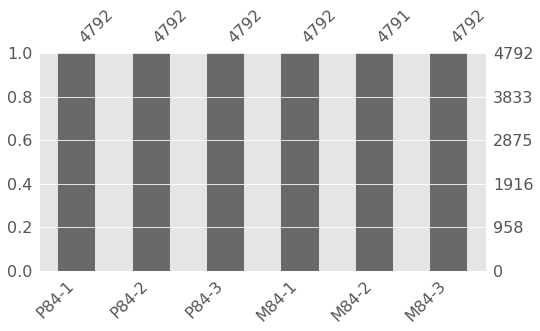

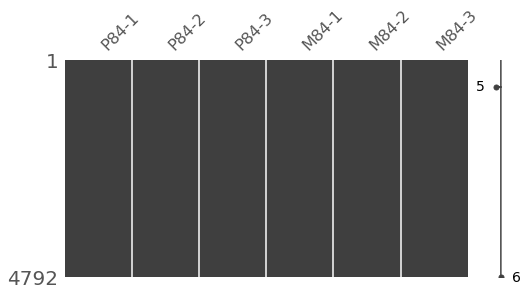

In [36]:
msno.bar(selection_normed_84, figsize=(8, 4))
msno.matrix(selection_normed_84 , figsize=(8, 4))

In [37]:
selection_normed_84['isna']=selection_normed_84.isna().sum(axis=1)
selection_normed_84['isna'].value_counts()

0    4791
1       1
Name: isna, dtype: int64

In [38]:
selection_normed_84[selection_normed_84['isna']>=1].join(df[['PG.ProteinAccessions']])

,P84-1,P84-2,P84-3,M84-1,M84-2,M84-3,isna,PG.ProteinAccessions
699,16.346868,16.333746,16.316448,13.698686,NaN,13.735593,1,Tb927.10.13040:mRNA-p1


In [39]:
print(selection_normed_84.shape)
selection_normed_84=selection_normed_84[selection_normed_84['isna']<=3]
print(selection_normed_84.shape)
selection_normed_84.drop(['isna'],inplace=True,axis=1)

(4792, 7)
(4792, 7)


## Fill Missing Values

In [40]:
%%R -i selection_normed_84
set.seed(81)
options(warn=-1)
library("missForest")
library("doParallel")
registerDoParallel(cores=4)
imputed_selection_normed <- missForest(selection_normed_84, 
                                       ntree = 20, 
                                       parallelize = "forests",
                                      replace=TRUE)$ximp

  missForest iteration 1 in progress...done!
  missForest iteration 2 in progress...done!
  missForest iteration 3 in progress...done!
  missForest iteration 4 in progress...done!


In [41]:
%R -o imputed_selection_normed
imputed_selection_normed.index = selection_normed_84.index.values
imputed_selection_normed.head(20)

,P84.1,P84.2,P84.3,M84.1,M84.2,M84.3
0,19.433367,19.405782,19.410226,19.540290,19.447632,19.326346
1,16.736426,16.959013,16.990730,17.462834,17.468791,17.411486
2,20.801961,20.869724,20.861586,20.861876,21.142281,20.361140
3,17.644039,17.646991,17.684354,18.084362,18.007076,18.118111
4,21.026952,21.018799,21.008456,21.275035,21.342388,21.327912
5,21.673216,21.649879,21.697428,21.466716,21.458917,21.535783
6,19.161943,19.358223,19.369195,19.116781,19.235461,18.972506
8,17.451370,17.332439,17.378955,17.245005,17.187653,17.021584
9,20.691219,20.642507,20.538293,21.262016,21.302878,21.267081
10,19.166882,19.423722,19.410749,19.772716,20.008417,19.756936


In [42]:
selection_normed_84[selection_normed_84.isna().sum(axis=1)>=1]

,P84-1,P84-2,P84-3,M84-1,M84-2,M84-3
699,16.346868,16.333746,16.316448,13.698686,NaN,13.735593


In [43]:
imputed_selection_normed.loc[selection_normed_84[selection_normed_84.isna().sum(axis=1)>=1].index]

,P84.1,P84.2,P84.3,M84.1,M84.2,M84.3
699,16.346868,16.333746,16.316448,13.698686,14.221407,13.735593


In [44]:
selection_normed_84.mean()

P84-1    18.684388
P84-2    18.689985
P84-3    18.690107
M84-1    18.683432
M84-2    18.694914
M84-3    18.693400
dtype: float64

## test PBP1

In [45]:
%%R -i imputed_selection_normed
options(warn=-1)
library("limma")

f<- factor(c(rep("P84",3),rep("M84",3))
           
           ,levels=c("P84","M84"))

design<- model.matrix(~0+f)
colnames(design)<- c("P84","M84")

#block <- c(1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)
#block <- c(1,1,2,2,3,3,1,1,1,2,2,2,3,3,3,1,1,1,2,2,2,3,3,3)

#dupcor <- duplicateCorrelation(imputed_X, design, block=block)

#https://support.bioconductor.org/p/77093/
#fit2<- lmFit(imputed_X, design, block=block, correlation=dupcor$consensus)
fit2<- lmFit(imputed_selection_normed, design)
contrast.matrix<- makeContrasts("P84-M84",
                                levels=design)

fit2<- contrasts.fit(fit2, contrast.matrix)
fit2<- eBayes(fit2)

tt_limma_2 <- topTable(fit2, coef = 1, sort.by = "none", number = Inf)




In [46]:
%R -o tt_limma_2
tt_limma_2.index = imputed_selection_normed.index.values

## Visualize Test

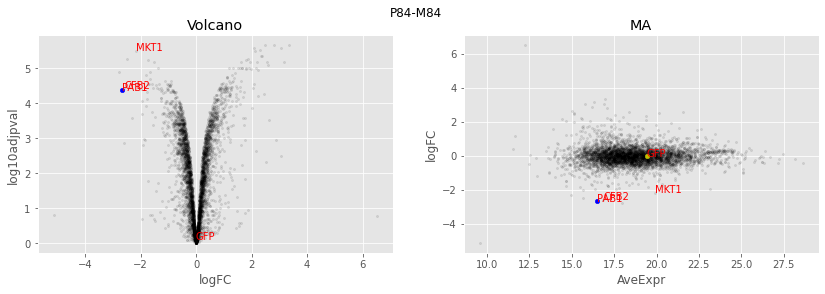

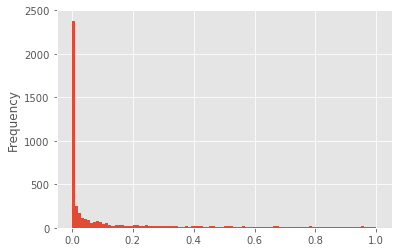

In [47]:
pval_col = 'log10pval'
pval_col = 'log10adjpval'

MKT1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.6.4770:')].index.values[0]
PAB1_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.8.4540:')].index.values[0]
CFB2_index = df[df['PG.ProteinAccessions'].str.contains('Tb927.1.4650:')].index.values[0]
GFP_index = 0


for table,name,p_index,p_id in zip([tt_limma_2],
                      
                 ["P84-M84"] ,
                             
                  [PAB1_index],
                  
                ['Tb927.8.4540'],                                
                                
                     
                     ):

    
    fig,axes=plt.subplots(figsize=(14,4), ncols=2, nrows=1)
    ax=axes[0]
    table['log10pval']=-np.log10(table['P.Value'])
    table['log10adjpval']=-np.log10(table['adj.P.Val'])
    
    table.plot(x='logFC',y=pval_col,
           kind='scatter',s=5, alpha=0.1, ax=ax, c='black')
    
    
    table.loc[[p_index]].plot(x='logFC',y=pval_col,
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='logFC',y='log10pval',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    #table.loc[[DRBD17_index]].plot(x='logFC',y=pval_col,
    #       kind='scatter',s=20,alpha=1,ax=ax,c='y')


    
    texts = [ax.text(table.loc[i]['logFC'], 
                       table.loc[i][pval_col],
                       ['PAB1', 'MKT1' , 'CFB2' ,'GFP'][p], c='r')
                       for p,i in enumerate([p_index,MKT1_index,CFB2_index,GFP_index])]


    
    #ax.set_xlim(-4,4)
    ax.set_title('Volcano')
    ax=axes[1]
    table.plot(x='AveExpr',y='logFC',
           kind='scatter',s=5,alpha=0.1,ax=ax,c='black')
    
    table.loc[[p_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='blue')
    #table.loc[[PAB1_index]].plot(x='AveExpr',y='logFC',
     #      kind='scatter',s=20,alpha=1,ax=ax,c='red')
    #table.loc[[DRBD17_index]].plot(x='AveExpr',y='logFC',
    #       kind='scatter',s=20,alpha=1,ax=ax,c='green')
    table.loc[[GFP_index]].plot(x='AveExpr',y='logFC',
           kind='scatter',s=20,alpha=1,ax=ax,c='y')

    
    
    texts = [ax.text(table.loc[i]['AveExpr'], 
                       table.loc[i]['logFC'],
                       ['PAB1', 'MKT1' , 'CFB2' ,'GFP'][p], c='r',fontsize=10)
                       for p,i in enumerate([p_index,MKT1_index,CFB2_index,GFP_index])]

    
    
    
    
    #ax.set_ylim(-4,4)
    ax.set_title('MA')
    plt.suptitle(name)
    plt.savefig(os.path.join(OUT_FOLDER,'prot_volcano_ma_'+name+'.png'))
    plt.show()
    
    table['P.Value'].plot(kind='hist',bins=100)
    plt.show()

In [48]:
tt_limma_2.loc[[MKT1_index,PAB1_index,CFB2_index]]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,log10pval,log10adjpval
3939,-2.177589,19.913423,-44.103435,5.293826e-09,0.000003,11.702589,8.276230,5.498804
4633,-2.680135,16.464360,-18.912674,9.871321e-07,0.000043,6.453741,6.005625,4.370431
486,-2.592616,16.864164,-20.015602,6.973288e-07,0.000038,6.831754,6.156562,4.425236


In [49]:
tt_limma_2.columns = ["P84-M84_"+n for n in tt_limma_2.columns]

all_df = pd.concat([df,tt_limma_2],axis=1)
all_df.head(10)

,PG.MolecularWeight,PG.ProteinAccessions,PG.Genes,PG.ProteinDescriptions,PG.ProteinNames,[1] 6-4+a.raw.PG.IsSingleHit,[2] 6-4+b.raw.PG.IsSingleHit,[3] 6-4+c.raw.PG.IsSingleHit,[4] 6-4-a.raw.PG.IsSingleHit,[5] 6-4-b.raw.PG.IsSingleHit,...,[20] GFP-b.raw.PG.Quantity,[21] GFP-c.raw.PG.Quantity,P84-M84_logFC,P84-M84_AveExpr,P84-M84_t,P84-M84_P.Value,P84-M84_adj.P.Val,P84-M84_B,P84-M84_log10pval,P84-M84_log10adjpval
0,40776.21,GFP.BLA,NaN,Reporter protein,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,1349816.125,1347236.5,-0.021631,19.427274,-0.347246,0.739855,0.780750,-7.955063,0.130853,0.107488
1,18603.02;18603.02,Tb05.5K5.100:mRNA-p1;Tb927.5.4450:mRNA-p1,NaN,transcript=Tb05.5K5.100:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,122133.6641,151233.0313,-0.552314,17.171547,-7.318788,0.000281,0.001324,0.112638,3.551018,2.878249
2,94061.35;94103.43,Tb05.5K5.110:mRNA-p1;Tb927.5.4460:mRNA-p1,NaN,transcript=Tb05.5K5.110:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2171076.25,2023829.875,0.055992,20.816428,0.298328,0.775168,0.811758,-7.973068,0.110604,0.090573
3,95765.04;95765.04,Tb05.5K5.120:mRNA-p1;Tb927.5.4470:mRNA-p1,NaN,transcript=Tb05.5K5.120:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,257573.3594,274341.9375,-0.411388,17.864156,-8.834142,0.000096,0.000626,1.336791,4.019914,3.203432
4,68313.98;68313.98,Tb05.5K5.130:mRNA-p1;Tb927.5.4480:mRNA-p1,NaN,transcript=Tb05.5K5.130:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2666045.75,2983822,-0.297042,21.166590,-7.304614,0.000284,0.001334,0.100226,3.546262,2.874771
5,21771.26;21771.26,Tb05.5K5.150:mRNA-p1;Tb927.5.4500:mRNA-p1,NaN,transcript=Tb05.5K5.150:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2508878.5,2500846.75,0.186369,21.580323,4.309021,0.004640,0.010862,-3.044464,2.333482,1.964083
6,108202.16;108202.16,Tb05.5K5.160:mRNA-p1;Tb927.5.4520:mRNA-p1,NaN,transcript=Tb05.5K5.160:mRNA | gene=Tb05.5K5.1...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,693865.5625,606181.4375,0.188205,19.202352,2.104437,0.078349,0.116130,-6.086031,1.105968,0.935057
7,29576.31;28980.58,Tb05.5K5.170:mRNA-p1;Tb927.5.4530:mRNA-p1,NaN,transcript=Tb05.5K5.170:mRNA | gene=Tb05.5K5.1...,NaN,TRUE,TRUE,TRUE,TRUE,TRUE,...,516343.375,179234.3906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,48697.02;36427.76,Tb05.5K5.20:mRNA-p1;Tb927.5.4360:mRNA-p1,NaN,transcript=Tb05.5K5.20:mRNA | gene=Tb05.5K5.20...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,158821.3594,160455.9531,0.236174,17.269501,3.332708,0.014931,0.028437,-4.332627,1.825916,1.546110
9,55321.5;55321.5;55321.5,Tb05.5K5.200:mRNA-p1;Tb11.v5.0409.1-p1;Tb927.5...,NaN,transcript=Tb05.5K5.200:mRNA | gene=Tb05.5K5.2...,NaN,FALSE,FALSE,FALSE,FALSE,FALSE,...,2769876.25,2704943.75,-0.653319,20.950666,-12.389999,0.000013,0.000195,3.600537,4.889782,3.710098


In [50]:
all_df['Gene_id'] = [PTUT.clean_id(n.split(':')[0].split(';')[0])
                     for n in df['PG.ProteinAccessions']]

desc_value='gene_product'
all_df['desc'] = df['PG.ProteinDescriptions'].apply(PTUT.make_desc, lookfor=desc_value)
find = all_df[all_df['desc']=='none'].index.values
all_df['desc'].loc[find]=all_df['PG.ProteinAccessions'].loc[find]
all_df.to_csv('FinalDataset_batch1_927_PBP1.csv')

## Save for web app

In [51]:
## Save for web app

In [52]:
!mkdir -p 'web_data/E927/E84'
for_web_app = all_df.rename({'desc':'Desc'}, axis=1)
for_web_app['Gene_acc']=np.arange(0,for_web_app.shape[0])

temp=for_web_app[['Gene_acc','PG.ProteinAccessions',
                    'P84-M84_logFC','P84-M84_AveExpr','P84-M84_adj.P.Val','Desc']]
temp.columns = ['Gene_acc','Gene_id','logFC','log_AveExpr','FDR','Desc']
temp = temp.dropna()
temp.to_csv('web_data/E927/E84/indata_84.csv',index=False)


r_dict = {
'[7] 8-4+a.raw.PG.Quantity':'84P1',
'[8] 8-4+b.raw.PG.Quantity':'84P2',
'[9] 8-4+c.raw.PG.Quantity':'84P3',
'[10] 8-4-a.raw.PG.Quantity':'84M1',
'[11] 8-4-b.raw.PG.Quantity':'84M2',
'[12] 8-4-c.raw.PG.Quantity':'84M3'}

for_web_app.rename(r_dict,axis=1,inplace=True)

temp2 = for_web_app[['Gene_acc','PG.ProteinAccessions', '84P1','84P2','84P3',
      '84M1','84M2','84M3','Desc']]
temp2.rename({'PG.ProteinAccessions':'Gene_id'} )

temp2=temp2.loc[temp.index]
temp2.to_csv('web_data/E927/E84/indata2_84.csv',index=False)


# Save Notebook

In [ ]:
!jupyter nbconvert --to html_toc analysis_927_first_batch.ipynb